In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd

In [3]:
# Batch Size, may need to tweak for memory
bs = 64

In this pilot analysis, I'll focus on a subset of the chemical structures downloaded from pubchem. There are 5 batches of images of ~10k each and we can use the 5th for validation for now.

We're going to try and use the fast.ai library for a regression problem, but they don't really go over this in lecture 1. It seems like a data-frame-based orginzation might work.

*A pandas DataFrame with a column of filenames and a column of labels which can be strings for classification, strings separated by a label_delim for multi-classification or floats for a regression problem (ImageDataBunch.from_df)*

In [4]:
# Get MW data
mw_df = pd.read_csv('../data/raw/csv/CID-malaria-1-stats.csv', index_col='cid')

In [5]:
mw_df.head()

,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,inchikey,iupacname,meshheadings,annothits,annothitcnt,aids,cidcdate,dois
cid,,,,,,,,,,,,,,,,,,,
51,2-Oxoglutaric acid,2-ketoglutaric acid|2-Oxopentanedioic acid|328...,146.098,C5H6O5,91.7,171.0,NaN,10,2,5,4,KPGXRSRHYNQIFN-UHFFFAOYSA-N,2-oxopentanedioic acid,Ketoglutaric Acids,122718,13,"1,3,5,7,9,13,15,19,21,23,25,29,31,33,35,37,39,...",20040916,10.1001/archneurol.2009.134|10.1001/archneurol...
525,Malic acid,malic acid|DL-malic acid|6915-15-7|2-Hydroxybu...,134.087,C4H6O5,94.8,129.0,-1.3,9,3,5,3,BJEPYKJPYRNKOW-UHFFFAOYSA-N,2-hydroxybutanedioic acid,NaN,65534,15,"155,157,161,165,167,175,360,361,368,373,374,41...",20040916,10.1001/archneur.58.6.944|10.1002/(sici)1097-0...
1023,Diphosphoric acid,Diphosphoric acid|Pyrophosphoric acid|2466-09-...,177.973,H4O7P2,124.0,147.0,NaN,9,4,7,2,XPPKVPWEQAFLFU-UHFFFAOYSA-N,phosphono dihydrogen phosphate,NaN,48990,12,"330,348,357,376,400,410,411,444,445,446,447,44...",20040916,10.1002/0471142700.nc1310s49|10.1002/asia.2012...
1052,Pyridoxamine,pyridoxamine|4-(AMINOMETHYL)-5-(HYDROXYMETHYL)...,168.196,C8H12N2O2,79.4,143.0,-1.0,12,3,4,2,NHZMQXZHNVQTQA-UHFFFAOYSA-N,4-(aminomethyl)-5-(hydroxymethyl)-2-methylpyri...,Pyridoxamine,69438,10,"348,357,376,410,411,422,444,445,446,447,448,45...",20040916,10.1002/14651858.cd004393|10.1002/14651858.cd0...
1329,"8-Cyclopentyl-1,3-dipropylxanthine","8-Cyclopentyl-1,3-dipropylxanthine|DPCPX|10214...",304.394,C16H24N4O2,69.3,436.0,4.0,22,1,3,5,FFBDFADSZUINTG-UHFFFAOYSA-N,"8-cyclopentyl-1,3-dipropyl-7H-purine-2,6-dione",NaN,237338,11,"357,361,364,368,371,373,374,375,410,411,422,42...",20050325,10.1002/(sici)1097-4652(199612)169:3&lt;538::a...


In [6]:
# Define image path
png_path = Path('../data/raw/png/')

# Find MW for all images if possible, create new table
mw_table = []

test = Path('../data/raw/png/3237981.png')
for p in png_path.iterdir():
    try:
        mw = mw_df.loc[int(p.stem)]['mw']
        mw_table.append([str(p), mw])
    except: continue

In [7]:
df = pd.DataFrame(mw_table, columns=['name', 'label'])
df.head()

,name,label
0,../data/raw/png/646083.png,362.400
1,../data/raw/png/2999093.png,283.342
2,../data/raw/png/663780.png,453.543
3,../data/raw/png/3245032.png,369.439
4,../data/raw/png/3308.png,287.359


In [8]:
data = (ImageList.from_df(df, path='.') 
        .random_split_by_pct()     
        .label_from_df(label_cls=FloatList)
        .transform(get_transforms(), size=224)           
        .databunch())         
data.normalize(imagenet_stats)

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:203: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


ImageDataBunch;

Train: LabelList (39918 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
362.4,283.342,453.543,369.439,287.359
Path: .;

Valid: LabelList (9979 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
250.682,276.354,301.316,386.404,332.407
Path: .;

Test: None

In [9]:
data.sanity_check

<bound method DataBunch.sanity_check of ImageDataBunch;

Train: LabelList (39918 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
362.4,283.342,453.543,369.439,287.359
Path: .;

Valid: LabelList (9979 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
250.682,276.354,301.316,386.404,332.407
Path: .;

Test: None>

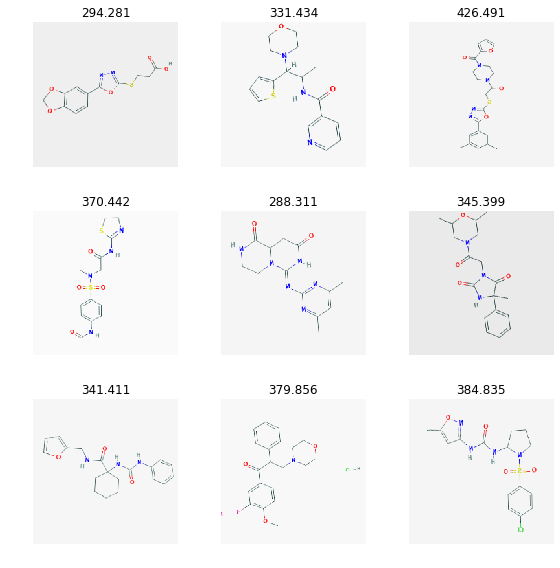

In [10]:
data.show_batch(rows=3, figsize=(8,8))

It looks like the images are being distorted. Is that from me or do they come like that? I'll need to dig into this a bit further.

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=root_mean_squared_error)
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,9613.225586,973.953613,31.013723,03:09
1,849.788330,355.859558,18.648367,03:09
2,728.053711,249.789902,15.555377,03:09
3,700.114197,223.958069,14.719043,03:09


In [17]:
learn.save('../models/0.1-stage1')

In [12]:
learn.load('../models/0.1-stage1')

Learner(data=ImageDataBunch;

Train: LabelList (39918 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
362.4,283.342,453.543,369.439,287.359
Path: .;

Valid: LabelList (9979 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
250.682,276.354,301.316,386.404,332.407
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


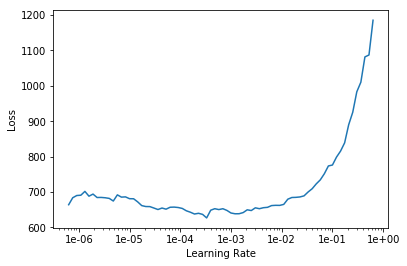

In [14]:
learn.recorder.plot()

In [15]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,624.891724,188.087082,13.310644,04:12
1,583.932129,152.877274,11.879664,04:19


In [16]:
learn.save('../models/0.1-stage2')

In [22]:
learn.data.valid_ds

LabelList (9979 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
250.682,276.354,301.316,386.404,332.407
Path: .

In [24]:
preds, y = learn.get_preds(ds_type=DatasetType.Valid) 

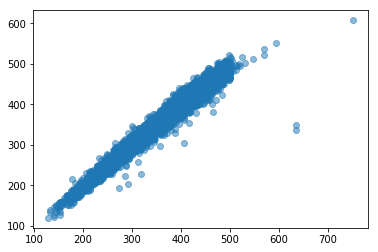

In [29]:
import matplotlib.pyplot as plt

plt.scatter(y, preds, alpha=0.5)
plt.show()